In [30]:
''' 
Doing the exercises in Doing Data Science in Python instead of R
'''

# Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install ggplot

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

sns.set(style="whitegrid")

In [21]:
df = pd.read_csv('dds_datasets/nyt1.csv')


# Get summary stats (similar to 'summary' command in R)
# info() is also useful
# df.describe() 
df.head()

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1


In [22]:
age_group = [-float('inf'), 18, 24, 34, 44, 54, 64, float('inf')]
df['Age_Category'] = pd.cut(df['Age'], age_group)
df.head(10)

# An impression is the number of times an Ad is shown in front of a user
# Users need to see an Ad before they click on it...so no clicks are possible
# Without impressions! 

,Age,Gender,Impressions,Clicks,Signed_In,Age_Category
0,36,0,3,0,1,"(34.0, 44.0]"
1,73,1,3,0,1,"(64.0, inf]"
2,30,0,3,0,1,"(24.0, 34.0]"
3,49,1,3,0,1,"(44.0, 54.0]"
4,47,1,11,0,1,"(44.0, 54.0]"
5,47,0,11,1,1,"(44.0, 54.0]"
6,0,0,7,1,0,"(-inf, 18.0]"
7,46,0,5,0,1,"(44.0, 54.0]"
8,16,0,3,0,1,"(-inf, 18.0]"
9,52,0,4,0,1,"(44.0, 54.0]"


<BarContainer object of 7 artists>

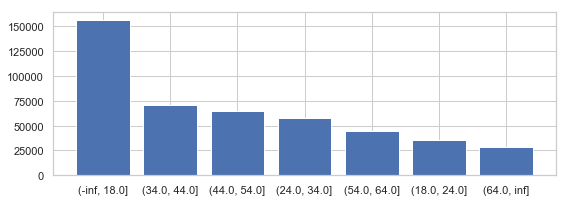

In [23]:
temp = df['Age_Category'].value_counts()
age_cats_df = pd.DataFrame({'age_cat': temp.index.astype('str'),'num':temp.values})

fig, ax = plt.subplots(figsize=(9,3))
ax.bar(age_cats_df['age_cat'], age_cats_df['num'])
# plt.show()

In [24]:
df['ctr'] = df['Clicks']/df['Impressions']
df.head(10)


,Age,Gender,Impressions,Clicks,Signed_In,Age_Category,ctr
0,36,0,3,0,1,"(34.0, 44.0]",0.000000
1,73,1,3,0,1,"(64.0, inf]",0.000000
2,30,0,3,0,1,"(24.0, 34.0]",0.000000
3,49,1,3,0,1,"(44.0, 54.0]",0.000000
4,47,1,11,0,1,"(44.0, 54.0]",0.000000
5,47,0,11,1,1,"(44.0, 54.0]",0.090909
6,0,0,7,1,0,"(-inf, 18.0]",0.142857
7,46,0,5,0,1,"(44.0, 54.0]",0.000000
8,16,0,3,0,1,"(-inf, 18.0]",0.000000
9,52,0,4,0,1,"(44.0, 54.0]",0.000000


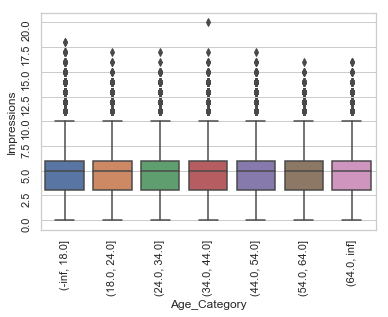

In [25]:
# Impressions and CTR per age group
# matplotlib doesn't have a good boxplot function... seaborn's is just like
# the boxplot function in R where you can specify x AND y!
# %matplotlib inline
ax = sns.boxplot(x=df['Age_Category'], y=df['Impressions'])
ax.tick_params(labelrotation=90)




(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

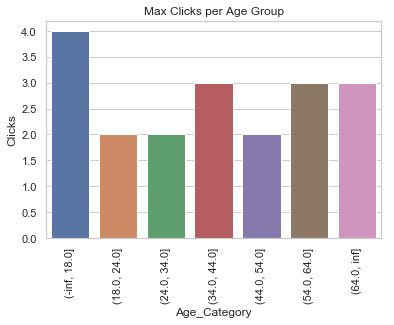

In [26]:
temp = df.groupby(['Age_Category']).max()
temp.head()
ax = sns.barplot(x=temp.index, y=temp['Clicks'])
ax.set_title('Max Clicks per Age Group')
plt.xticks(rotation=90)

C:\Users\212475369\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


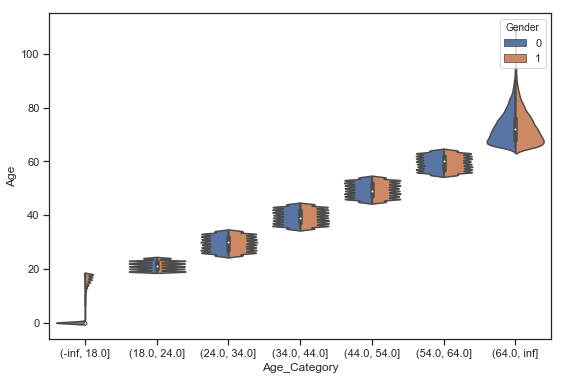

In [38]:
fig, ax = plt.subplots(figsize=(9,6))
ax = sns.violinplot(data=df, x='Age_Category', y='Age', split=True, hue='Gender')

C:\Users\212475369\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


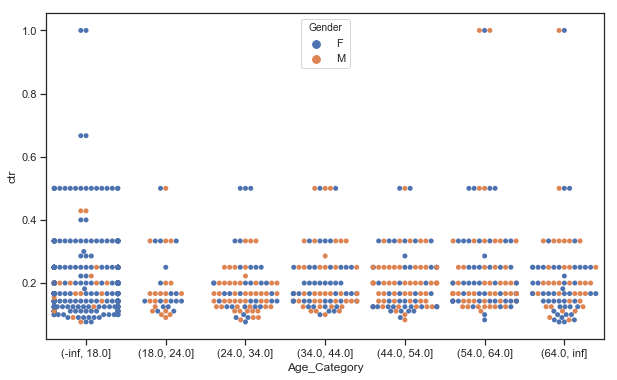

<Figure size 408.85x360 with 0 Axes>

In [56]:
sns.set_style('ticks')
df1 = df.loc[df['Impressions'] > 0, :].copy()
df1['Gender'].loc[df1['Gender'] == 0] = 'F'
df1['Gender'].loc[df1['Gender'] == 1] = 'M'
random_samp = df1.sample(10000)
random_samp.head()
fig, ax = plt.subplots(figsize=(10,6))
sns.catplot(ax=ax, data=random_samp.loc[random_samp['ctr'] > 0], 
                 x='Age_Category', y='ctr', hue='Gender', 
                 kind='swarm')
plt.clf()